In [1]:

import pandas as pd
import numpy as np
from plotnine import *

In [2]:
import pandas as pd

file_path = '/Users/jluu25/Desktop/Project/2023 MTA Bus Tables.xlsx'

df = pd.ExcelFile(file_path)

weekday_df = pd.read_excel(df, sheet_name='Weekday')
weekend_df = pd.read_excel(df, sheet_name='Weekend')
total_df = pd.read_excel(df, sheet_name='Total')
footnotes_df = pd.read_excel(df, sheet_name='Footnotes')

weekday_df.head()




,Average Weekday MTA Bus Ridership,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Route,*,2018.000000,2019.0000,2020.0,2021.0000,2022.0000,2023.0,NaN,2022 - 2023 Change,NaN,2023 Rank
1,Local Routes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B100,NaN,5019.803150,5045.3569,2392.0,2764.7368,3325.7649,3517.0,NaN,191.2351,0.057501,27
3,B103,NaN,13684.803150,13239.7791,8286.0,7703.2117,8011.4269,7445.0,NaN,-566.4269,-0.070702,9
4,Bx23,NaN,3721.224409,3793.3363,1723.0,1891.1163,2583.1031,2796.0,NaN,212.8969,0.082419,35


In [3]:
weekend_df.head()

,Average Weekend (Saturday + Sunday) MTA Bus Ridership,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Route,*,2018.000000,2019.0000,2020.0,2021.0000,2022.0000,2023.0,NaN,2022 - 2023 Change,NaN,2023 Rank
1,Local Routes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B100,NaN,2400.403846,2484.4424,1345.0,1534.3735,1673.8257,1773.0,NaN,99.1743,0.059250,42
3,B103,NaN,14068.884615,14035.8987,9815.0,8487.4640,8413.2937,8048.0,NaN,-365.2937,-0.043419,9
4,Bx23,NaN,2388.346154,2272.5014,1141.0,1222.2337,1966.6098,2405.0,NaN,438.3902,0.222917,36


In [4]:
total_df.head()

,Annual MTA Bus Ridership,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,Route,*,2018.0,2.019000e+03,2.020000e+03,2.021000e+03,2.022000e+03,2.023000e+03,NaN,2022 - 2023 Change,NaN,2023 Rank
1,Local Routes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B100,NaN,1408029.0,1.419045e+06,6.864329e+05,7.874773e+05,9.386198e+05,9.901395e+05,NaN,51519.6551,0.054889,29
3,B103,NaN,4246206.0,4.133501e+06,2.657829e+06,2.423659e+06,2.496944e+06,2.330244e+06,NaN,-166700.0702,-0.066762,9
4,Bx23,NaN,1076181.0,1.088672e+06,5.021419e+05,5.472033e+05,7.649742e+05,8.416825e+05,NaN,76708.3378,0.100276,35


In [5]:
footnotes_df.head()

,Ridership Notes,Unnamed: 1
0,1,"On 9/25/2016, Q70 Select Bus Service replaced..."


In [6]:
# Clean the Weekday sheet
weekday_cleaned = weekday_df.iloc[2:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10]]  # Select relevant rows and columns
weekday_cleaned.columns = ['Route', '2018', '2019', '2020', '2021', '2022', '2023', '2022-2023 Change', 'Growth Rate', '2023 Rank']  # Rename columns
weekday_cleaned = weekday_cleaned.reset_index(drop=True)  # Reset index

# Clean the Weekend sheet
weekend_cleaned = weekend_df.iloc[2:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10]]  # Select relevant rows and columns
weekend_cleaned.columns = ['Route', '2018', '2019', '2020', '2021', '2022', '2023', '2022-2023 Change', 'Growth Rate', '2023 Rank']  # Rename columns
weekend_cleaned = weekend_cleaned.reset_index(drop=True)  # Reset index

# Clean the Total sheet
total_cleaned = total_df.iloc[2:, [0, 2, 3, 4, 5, 6, 7, 8, 9, 10]]  # Select relevant rows and columns
total_cleaned.columns = ['Route', '2018', '2019', '2020', '2021', '2022', '2023', '2022-2023 Change', 'Growth Rate', '2023 Rank']  # Rename columns
total_cleaned = total_cleaned.reset_index(drop=True)  # Reset index

# Clean the Footnotes sheet 
footnotes_cleaned = footnotes_df[['Ridership Notes']].dropna().reset_index(drop=True)


In [7]:
weekday_cleaned.head()

,Route,2018,2019,2020,2021,2022,2023,2022-2023 Change,Growth Rate,2023 Rank
0,B100,5019.803150,5045.3569,2392.0,2764.7368,3325.7649,3517.0,NaN,191.2351,0.057501
1,B103,13684.803150,13239.7791,8286.0,7703.2117,8011.4269,7445.0,NaN,-566.4269,-0.070702
2,Bx23,3721.224409,3793.3363,1723.0,1891.1163,2583.1031,2796.0,NaN,212.8969,0.082419
3,Q6,10669.641732,10720.3641,5019.0,6254.7938,7246.4803,6794.0,NaN,-452.4803,-0.062441
4,Q7,5039.366142,4908.0562,2061.0,2668.6178,2990.5550,2826.0,NaN,-164.555,-0.055025


In [8]:
weekend_cleaned.head()

,Route,2018,2019,2020,2021,2022,2023,2022-2023 Change,Growth Rate,2023 Rank
0,B100,2400.403846,2484.4424,1345.0,1534.3735,1673.8257,1773.0,NaN,99.1743,0.059250
1,B103,14068.884615,14035.8987,9815.0,8487.4640,8413.2937,8048.0,NaN,-365.2937,-0.043419
2,Bx23,2388.346154,2272.5014,1141.0,1222.2337,1966.6098,2405.0,NaN,438.3902,0.222917
3,Q6,10229.892308,10591.3383,5771.0,6602.4749,7197.9731,6781.0,NaN,-416.9731,-0.057929
4,Q7,4398.096154,4510.5929,2765.0,2643.7111,2778.3462,2818.0,NaN,39.6538,0.014272


In [9]:
total_cleaned.head()

,Route,2018,2019,2020,2021,2022,2023,2022-2023 Change,Growth Rate,2023 Rank
0,B100,1408029.0,1.419045e+06,6.864329e+05,7.874773e+05,9.386198e+05,9.901395e+05,NaN,51519.6551,0.054889
1,B103,4246206.0,4.133501e+06,2.657829e+06,2.423659e+06,2.496944e+06,2.330244e+06,NaN,-166700.0702,-0.066762
2,Bx23,1076181.0,1.088672e+06,5.021419e+05,5.472033e+05,7.649742e+05,8.416825e+05,NaN,76708.3378,0.100276
3,Q6,3272458.4,3.305572e+06,1.606003e+06,1.949949e+06,2.236957e+06,2.097682e+06,NaN,-139274.4631,-0.062261
4,Q7,1521558.0,1.494546e+06,6.753858e+05,8.223551e+05,9.124646e+05,8.712826e+05,NaN,-41182.0255,-0.045133


In [10]:
merged_df = pd.merge(weekday_cleaned, weekend_cleaned, on='Route', suffixes=('_Weekday', '_Weekend'))


In [11]:
merged_df = pd.merge(merged_df, total_cleaned, on='Route', suffixes=('', '_Total'))


In [12]:
merged_df.head()


,Route,2018_Weekday,2019_Weekday,2020_Weekday,2021_Weekday,2022_Weekday,2023_Weekday,2022-2023 Change_Weekday,Growth Rate_Weekday,2023 Rank_Weekday,2018_Weekend,2019_Weekend,2020_Weekend,2021_Weekend,2022_Weekend,2023_Weekend,2022-2023 Change_Weekend,Growth Rate_Weekend,2023 Rank_Weekend,2018,2019,2020,2021,2022,2023,2022-2023 Change,Growth Rate,2023 Rank
0,B100,5019.803150,5045.3569,2392.0,2764.7368,3325.7649,3517.0,NaN,191.2351,0.057501,2400.403846,2484.4424,1345.0,1534.3735,1673.8257,1773.0,NaN,99.1743,0.059250,1408029.0,1.419045e+06,6.864329e+05,7.874773e+05,9.386198e+05,9.901395e+05,NaN,51519.6551,0.054889
1,B103,13684.803150,13239.7791,8286.0,7703.2117,8011.4269,7445.0,NaN,-566.4269,-0.070702,14068.884615,14035.8987,9815.0,8487.4640,8413.2937,8048.0,NaN,-365.2937,-0.043419,4246206.0,4.133501e+06,2.657829e+06,2.423659e+06,2.496944e+06,2.330244e+06,NaN,-166700.0702,-0.066762
2,Bx23,3721.224409,3793.3363,1723.0,1891.1163,2583.1031,2796.0,NaN,212.8969,0.082419,2388.346154,2272.5014,1141.0,1222.2337,1966.6098,2405.0,NaN,438.3902,0.222917,1076181.0,1.088672e+06,5.021419e+05,5.472033e+05,7.649742e+05,8.416825e+05,NaN,76708.3378,0.100276
3,Q6,10669.641732,10720.3641,5019.0,6254.7938,7246.4803,6794.0,NaN,-452.4803,-0.062441,10229.892308,10591.3383,5771.0,6602.4749,7197.9731,6781.0,NaN,-416.9731,-0.057929,3272458.4,3.305572e+06,1.606003e+06,1.949949e+06,2.236957e+06,2.097682e+06,NaN,-139274.4631,-0.062261
4,Q7,5039.366142,4908.0562,2061.0,2668.6178,2990.5550,2826.0,NaN,-164.555,-0.055025,4398.096154,4510.5929,2765.0,2643.7111,2778.3462,2818.0,NaN,39.6538,0.014272,1521558.0,1.494546e+06,6.753858e+05,8.223551e+05,9.124646e+05,8.712826e+05,NaN,-41182.0255,-0.045133


In [13]:
# Melt the merged dataframe to get rid of the wide format and make it long
# Melt the dataframe to get a long format with Route, Year, and Ridership columns
tidy_merged_df = merged_df.melt(id_vars=['Route'], 
                                value_vars=['2018', '2019', '2020', '2021', '2022', '2023'],
                                var_name='Year', 
                                value_name='Ridership')

# Check the first few rows
tidy_merged_df.head()


,Route,Year,Ridership
0,B100,2018,1408029.0
1,B103,2018,4246206.0
2,Bx23,2018,1076181.0
3,Q6,2018,3272458.4
4,Q7,2018,1521558.0


In [14]:
tidy_merged_df

,Route,Year,Ridership
0,B100,2018,1408029.0
1,B103,2018,4246206.0
2,Bx23,2018,1076181.0
3,Q6,2018,3272458.4
4,Q7,2018,1521558.0
...,...,...,...
469,NaN,2023,NaN
470,NaN,2023,NaN
471,NaN,2023,NaN
472,NaN,2023,NaN


In [ ]:
local.to.csv("tidy_merged")

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 60 rows containing missing values.


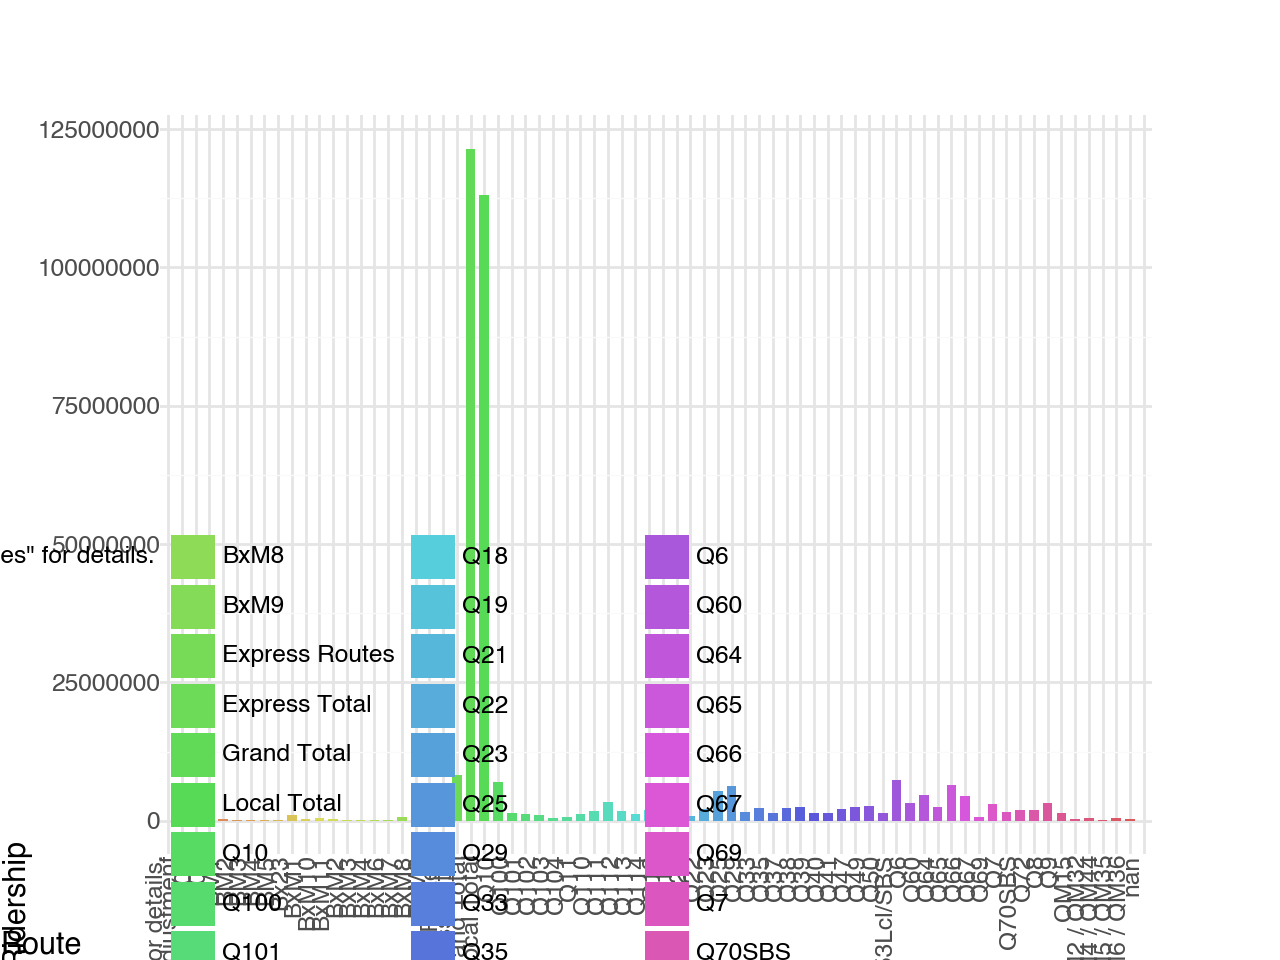

In [15]:
from plotnine import ggplot, aes, geom_bar, position_dodge, labs, theme_minimal

# Create a bar plot comparing ridership for each route
plot_ridership = (
    ggplot(tidy_merged_df, aes(x='Route', y='Ridership', fill='Route')) 
    + geom_bar(stat='identity', position=position_dodge(width=0.8), width=0.7) 
    + labs(title='Ridership by Route (2018-2023)', x='Route', y='Ridership') 
    + theme_minimal() 
    + theme(axis_text_x=element_text(rotation=90, hjust=1))  # Rotate x-axis labels for readability
)



/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


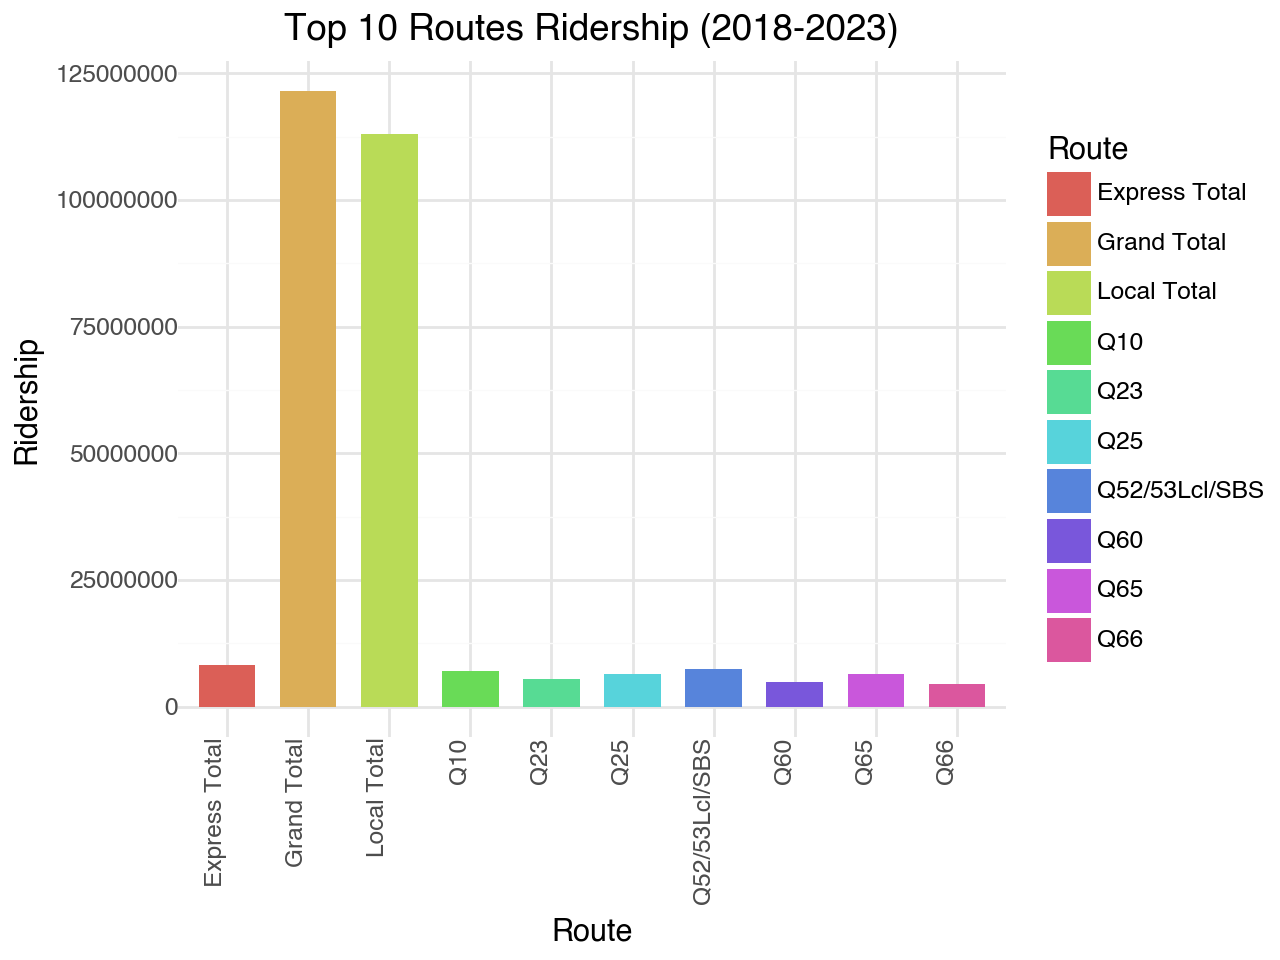

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 60 rows containing missing values.


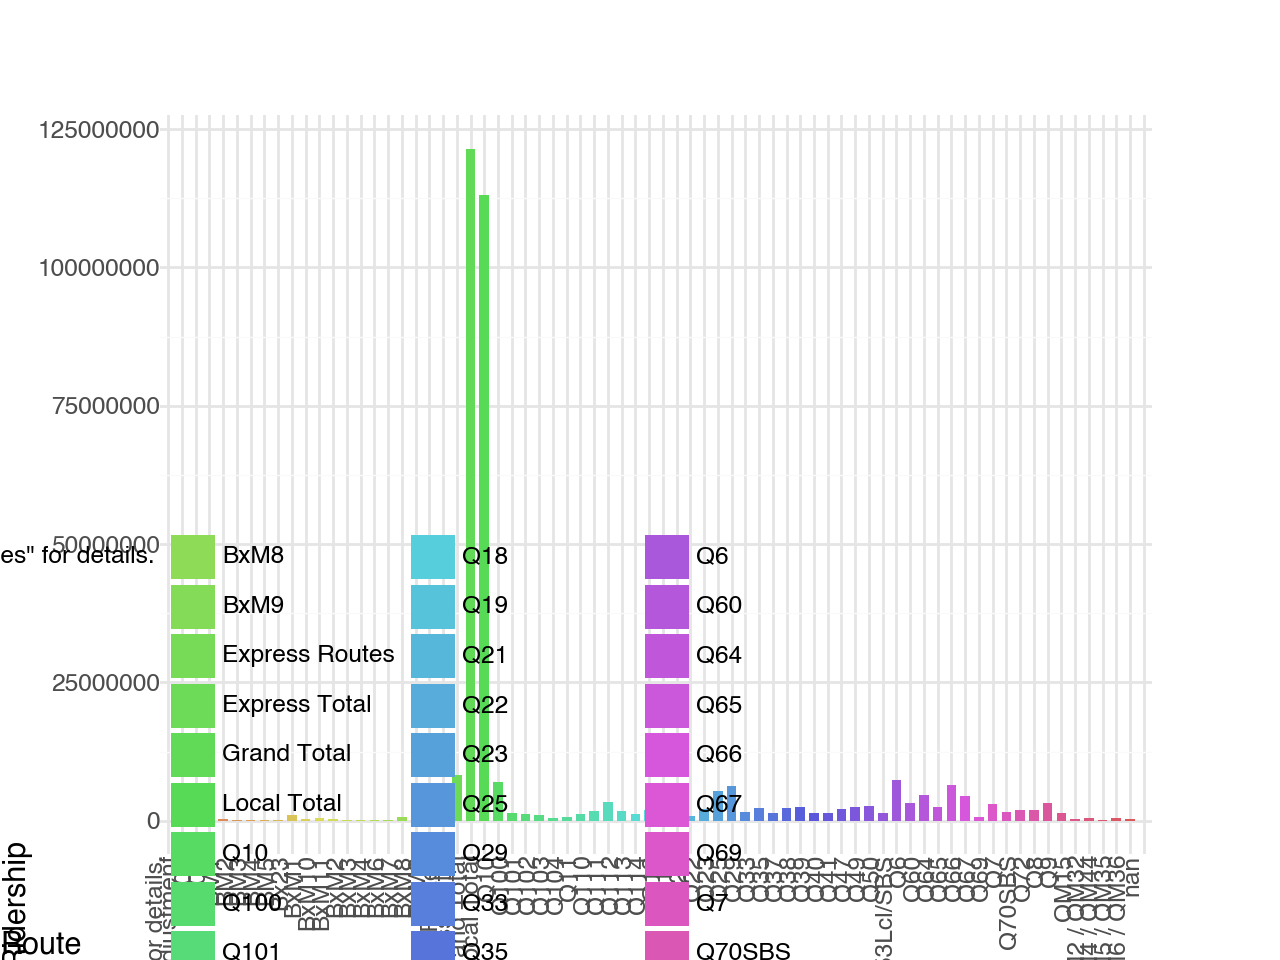

In [19]:
# Limit the data to only the top 10 routes by ridership to avoid skewing from outliers
top_10_routes = tidy_merged_df.groupby('Route')['Ridership'].sum().sort_values(ascending=False).head(10).index

# Filter the data to only include the top 10 routes
top_10_routes_df = tidy_merged_df[tidy_merged_df['Route'].isin(top_10_routes)]

# Create the plot again for the top 10 routes
plot_top_10_routes = (
    ggplot(top_10_routes_df, aes(x='Route', y='Ridership', fill='Route')) 
    + geom_bar(stat='identity', position=position_dodge(width=0.8), width=0.7) 
    + labs(title='Top 10 Routes Ridership (2018-2023)', x='Route', y='Ridership') 
    + theme_minimal() 
    + theme(axis_text_x=element_text(rotation=90, hjust=1))  
)




/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 5 rows containing missing values.


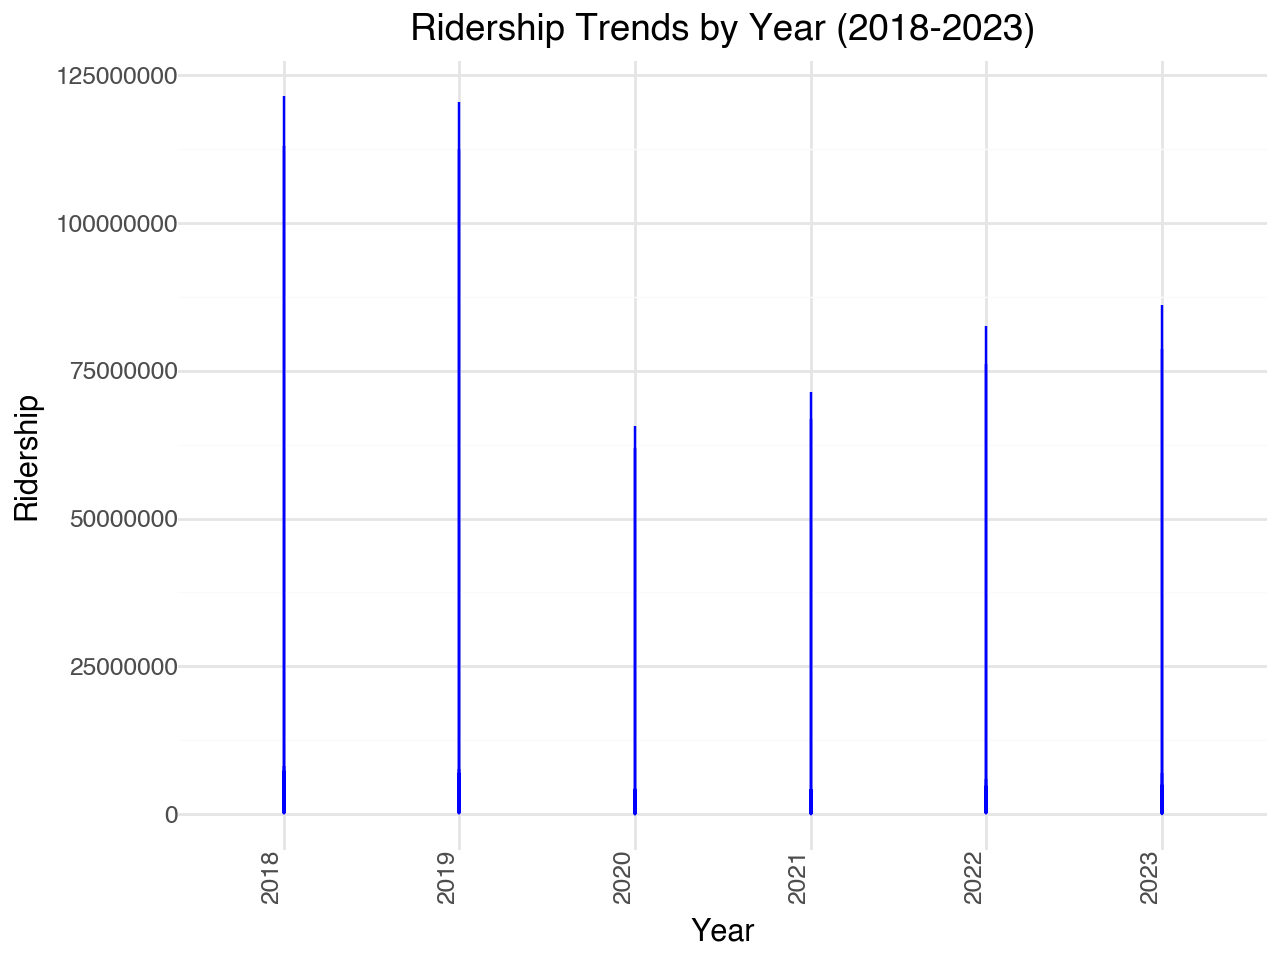

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_bar : Removed 60 rows containing missing values.


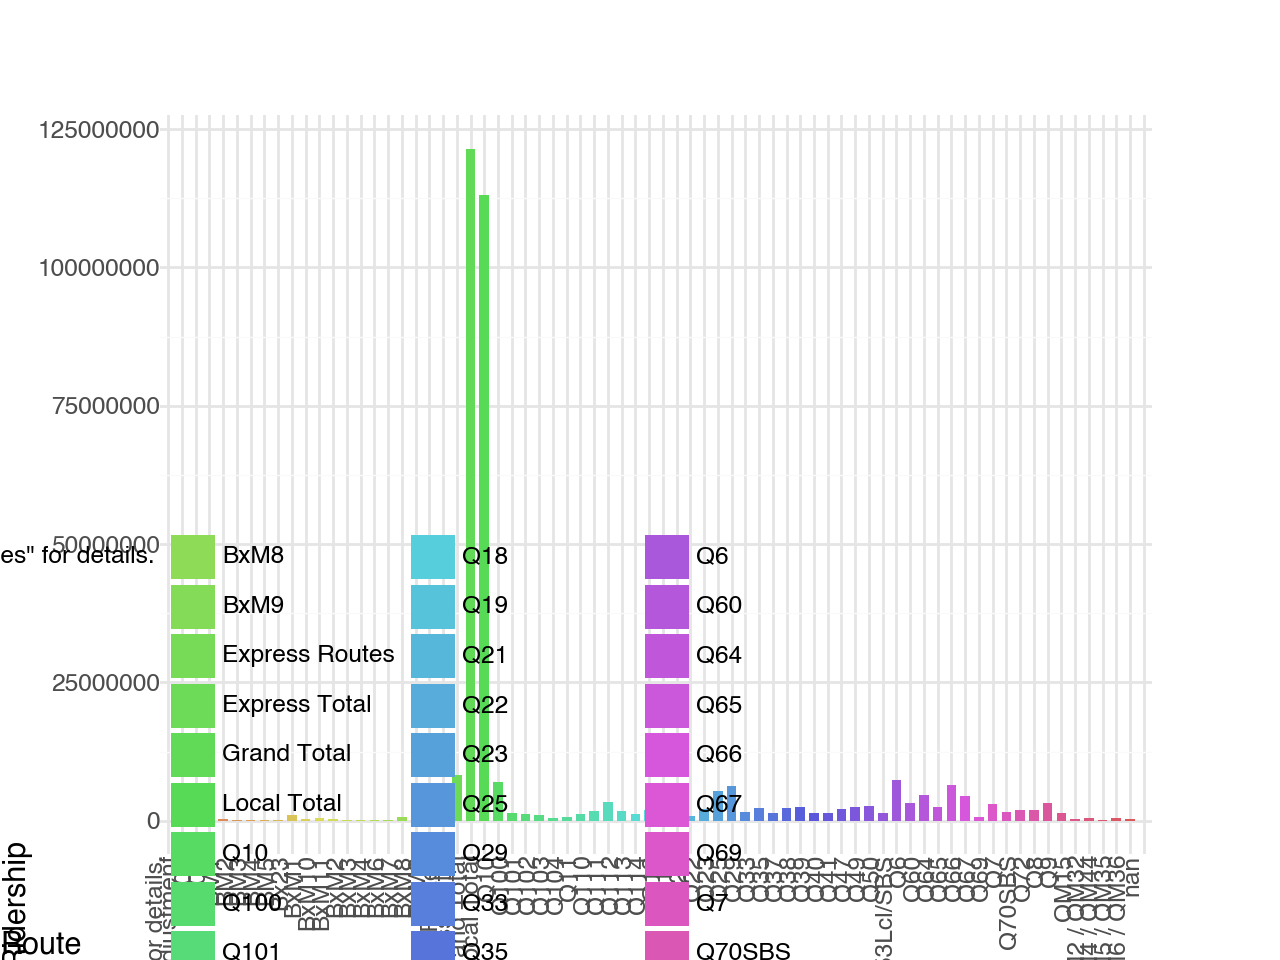

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


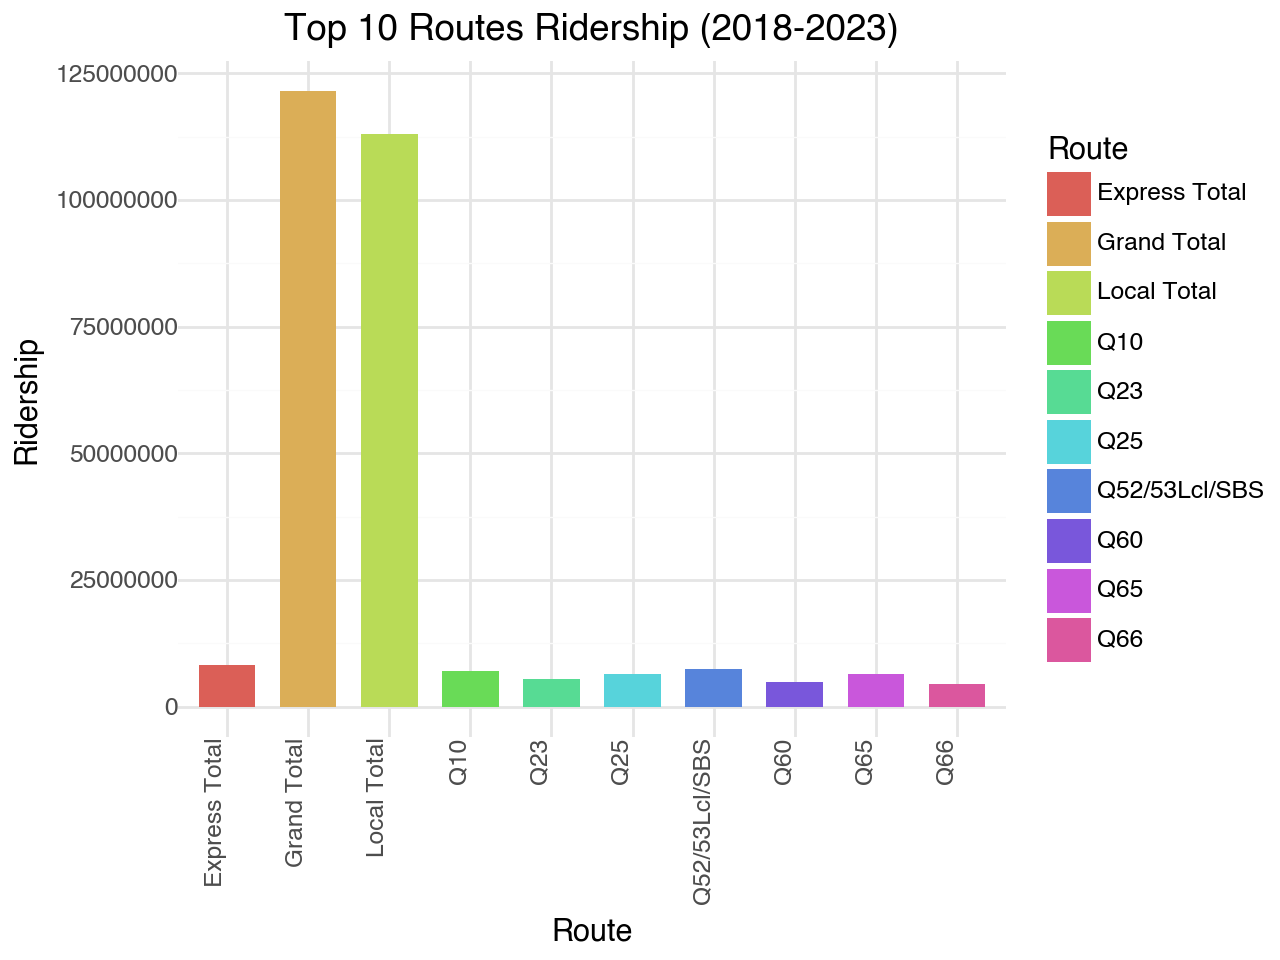

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().
/opt/anaconda3/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 54 rows containing missing values.


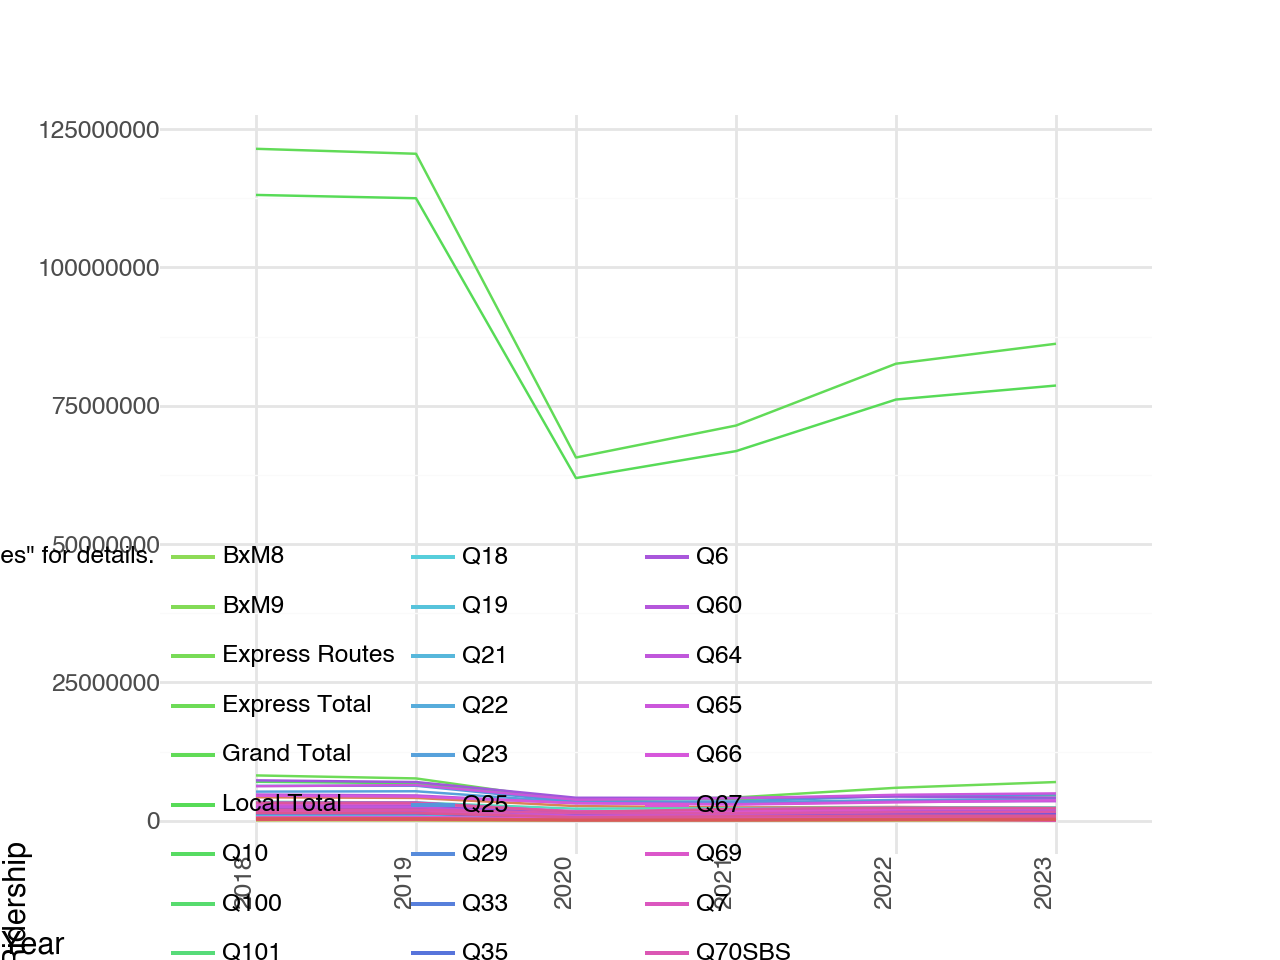

In [23]:
# Create a line plot comparing Ridership across different years 
plot_ridership_year_no_route = (
    ggplot(tidy_merged_df, aes(x='Year', y='Ridership')) 
    + geom_line(color='blue') 
    + labs(title='Ridership Trends by Year (2018-2023)', x='Year', y='Ridership') 
    + theme_minimal() 
    + theme(axis_text_x=element_text(rotation=90, hjust=1))  
)




